In [1]:
import cv2, os, sys
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

## 1.画像を読み込み、HLS,HSV,YUV,YCrCbに変換し、横につなげる

In [2]:
img = "C:\\Users\\Shimo_Y_15\\230517\\dog193.jpg"

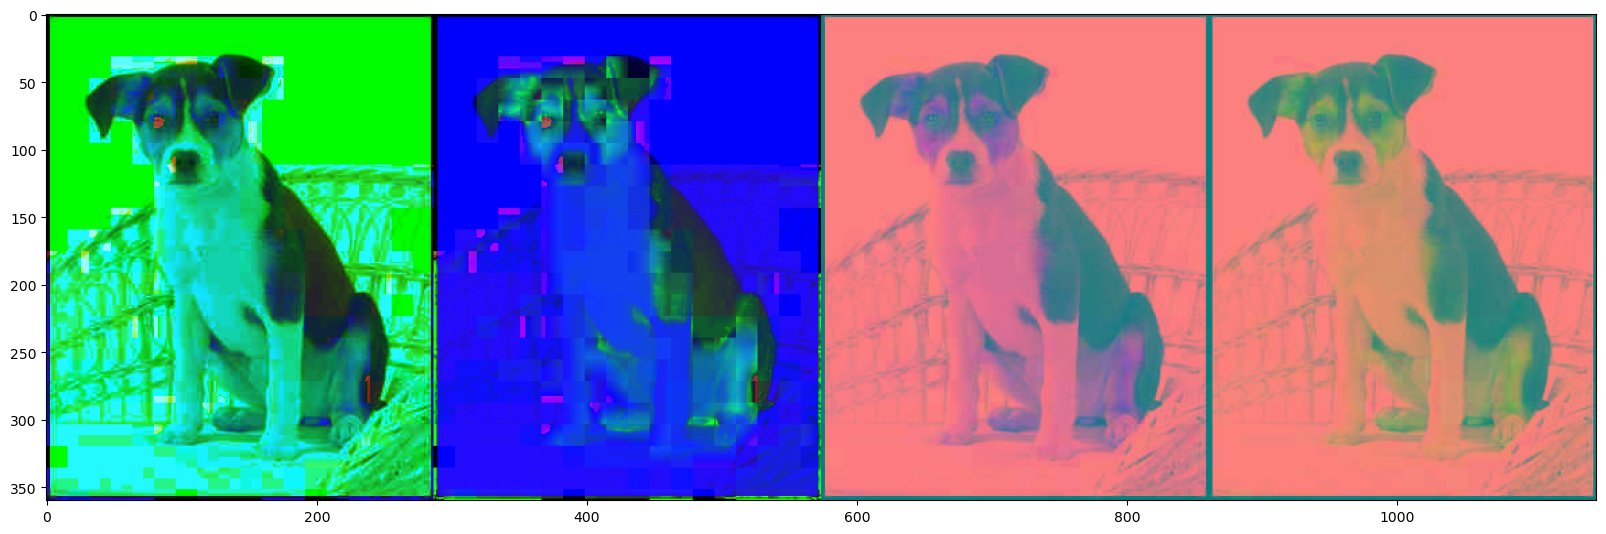

In [7]:
dog_bgr = cv2.imread(img)
dog_rgb = cv2.cvtColor(dog_bgr, cv2.COLOR_BGR2RGB)
dog_HLS = cv2.cvtColor(dog_bgr, cv2.COLOR_BGR2HLS)

dog_HSV = cv2.cvtColor(dog_bgr, cv2.COLOR_BGR2HSV)

dog_YUV = cv2.cvtColor(dog_bgr, cv2.COLOR_BGR2YUV)

dog_YCrCb = cv2.cvtColor(dog_bgr, cv2.COLOR_BGR2YCrCb)

dog_rgb.shape

img_concat = cv2.hconcat([dog_HLS,dog_HSV,dog_YUV,dog_YCrCb])
plt.figure(figsize=(20,20))
plt.imshow(img_concat, cmap = 'gray')

## 2.2枚の画像をブレンド

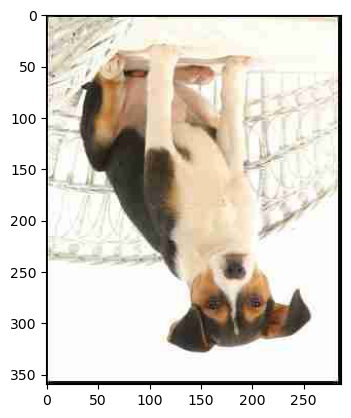

In [10]:
dog_rgb_re = cv2.flip(dog_rgb,-1)
plt.imshow(dog_rgb_re)

In [11]:
h,w,c = dog_rgb.shape

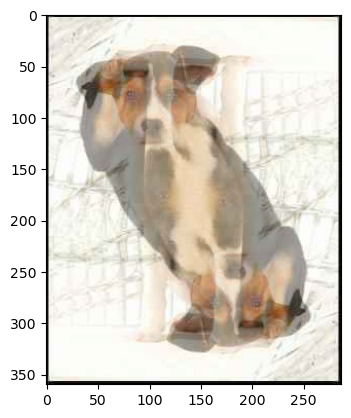

In [12]:
dog_blend = cv2.addWeighted(dog_rgb, 0.5, dog_rgb_re, 0.5, gamma = 0)
plt.imshow(dog_blend)

## 3.trhreshの値を変更し縦に表示

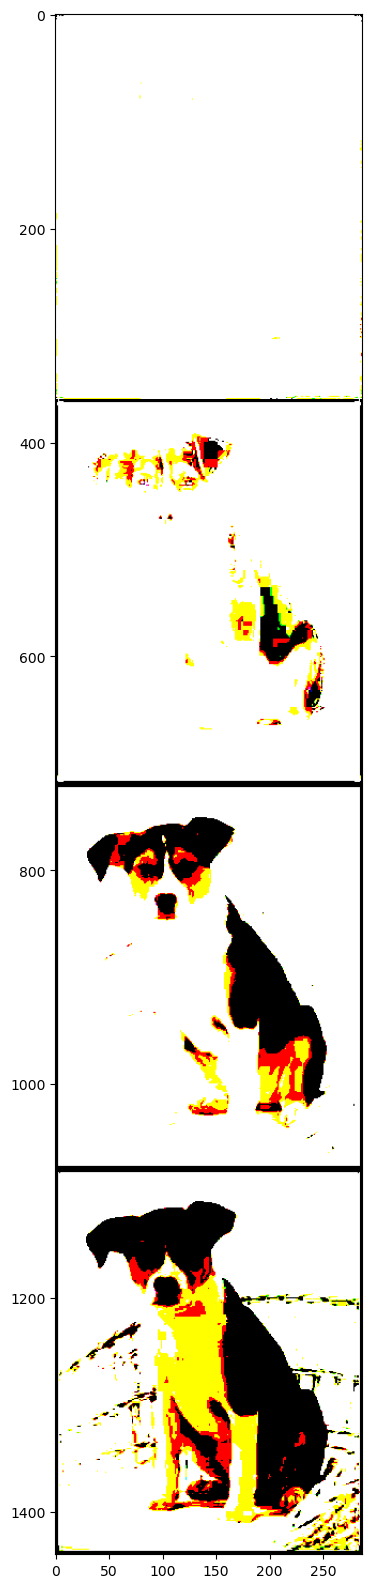

In [16]:
ret, dog_0 = cv2.threshold(dog_rgb,0,255,cv2.THRESH_BINARY)

ret, dog_50 = cv2.threshold(dog_rgb,50,255,cv2.THRESH_BINARY)

ret, dog_128 = cv2.threshold(dog_rgb,128,255,cv2.THRESH_BINARY)

ret, dog_200 = cv2.threshold(dog_rgb,200,255,cv2.THRESH_BINARY)

dog_thresh = cv2.vconcat([dog_0, dog_50, dog_128, dog_200])
plt.figure(figsize = (20,20))
plt.imshow(dog_thresh, cmap = 'gray')

## 4.threshTypeパラメータを変更

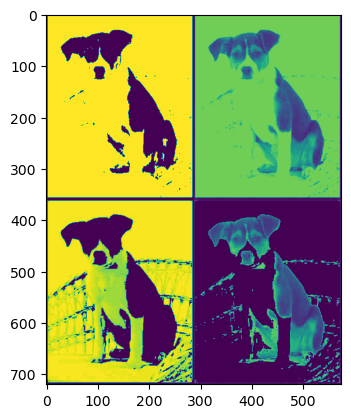

In [31]:
dog_bgr = cv2.imread(img)
dog_rgb = cv2.cvtColor(dog_bgr, cv2.COLOR_BGR2RGB)
dog_gray = cv2.cvtColor(dog_bgr,cv2.COLOR_BGR2GRAY)
ret, dog_OTSU = cv2.threshold(dog_gray,200,255,cv2.THRESH_OTSU)
ret, dog_TRUNC = cv2.threshold(dog_gray, 200,255,cv2.THRESH_TRUNC)
ret, dog_TOZERO = cv2.threshold(dog_gray,200,255,cv2.THRESH_TOZERO)
ret, dog_TOZERO_INV = cv2.threshold(dog_gray,200,255,cv2.THRESH_TOZERO_INV)

dog_con1 = cv2.hconcat([dog_OTSU,dog_TRUNC])
dog_con2 = cv2.hconcat([dog_TOZERO,dog_TOZERO_INV])
dog_con = cv2.vconcat([dog_con1, dog_con2])


plt.imshow(dog_con)

## 5.adaptiveTreshold

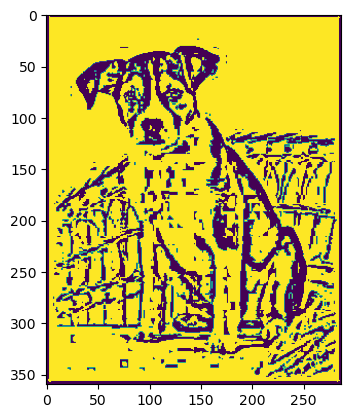

In [38]:
dog_bgr = cv2.imread(img)
dog_gray = cv2.cvtColor(dog_bgr,cv2.COLOR_BGR2GRAY)

dog_adap = cv2.adaptiveThreshold(dog_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21,3)

plt.imshow(dog_adap)

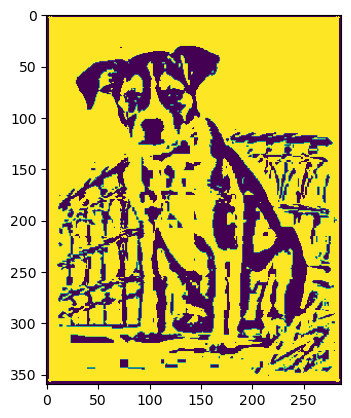

In [39]:
dog_bgr = cv2.imread(img)
dog_gray = cv2.cvtColor(dog_bgr,cv2.COLOR_BGR2GRAY)

dog_adap = cv2.adaptiveThreshold(dog_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,21,3)

plt.imshow(dog_adap)

## 6.BGR画像とブレンド

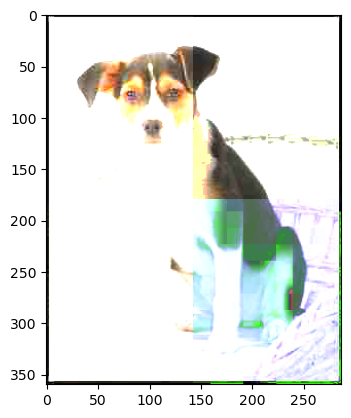

In [74]:
dog_bgr = cv2.imread(img)
dog_rgb = cv2.cvtColor(dog_bgr, cv2.COLOR_BGR2RGB)
dog_gray = cv2.cvtColor(dog_bgr,cv2.COLOR_BGR2GRAY)
dog_rgb.shape

dog_gray_3ch = np.stack((dog_gray,)*3,-1)

ret, dog_200 = cv2.threshold(dog_rgb,200,255,cv2.THRESH_BINARY)

dog_HSV = cv2.cvtColor(dog_bgr, cv2.COLOR_BGR2HSV)

base = np.zeros(shape = (360,287,3),dtype = np.uint8)
base[:base.shape[0]//2, :base.shape[1]//2] = dog_rgb[:base.shape[0]//2, :base.shape[1]//2]
base[base.shape[0]//2:, :base.shape[1]//2] = dog_gray_3ch[dog_gray_3ch.shape[0]//2:, :dog_gray_3ch.shape[1]//2]
base[:base.shape[0]//2, base.shape[1]//2:] = dog_200[:dog_200.shape[0]//2, dog_200.shape[1]//2:]
base[base.shape[0]//2:, base.shape[1]//2:] = dog_HSV[dog_HSV.shape[0]//2:, dog_HSV.shape[1]//2:]

dog_ble = cv2.addWeighted(dog_rgb, 1, base, 1, gamma = 0)

plt.imshow(dog_ble, cmap = 'gray')